# 6.2 Regresión Lineal Múltiple USA

## Lucía castañeda
## A01706644

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Evaluación1_EUA.csv')
df.head(5)

,0,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/23,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,1,5858.0,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/23,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,...,4.85,4.77,4.68,0,f,1,1,0,0,0.66
2,2,8142.0,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/23,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,...,4.78,4.67,4.67,0,f,13,0,13,0,0.09
3,3,8339.0,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/23,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,0,https://a0.muscache.com/pictures/miso/Hosting-...,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,4,8739.0,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/23,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65


In [4]:
# Seleccionar los tipos de habitaciones de interés
room_types = ["Entire home/apt", "Private room"]
data = df[df["room_type"].isin(room_types)]

host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

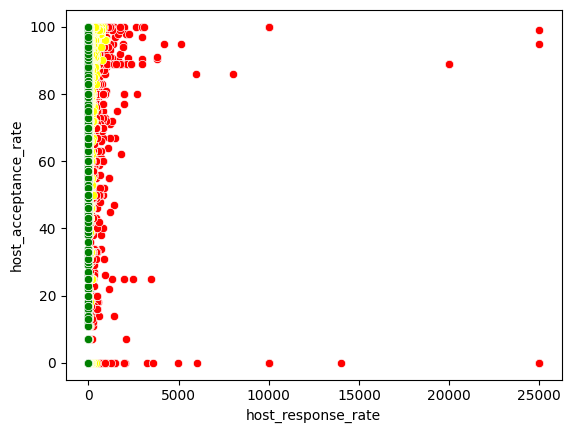

In [5]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=data)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=data)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=data)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="green", data=data)

In [6]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_response_rate', 'price','number_of_reviews', 'review_scores_rating']]
Var_Dep= df['host_acceptance_rate']

In [7]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [10]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.74143301e-01,  1.24626044e-04,  3.37889572e-02, -7.02116669e-01]),
 'rank_': 4,
 'singular_': array([1.05961528e+05, 7.87217153e+03, 3.02599285e+03, 3.67185090e+01]),
 'intercept_': 33.766699944769805}

**Modelo matemático: y= 5.74143301e-01x1 +1.24626044e-04x2 + 3.37889572e-02x3 + -7.02116669e-01x4 + 33.766699944769805**

In [11]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.4301578322006856

“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“

<Axes: xlabel='availability_365', ylabel='price'>

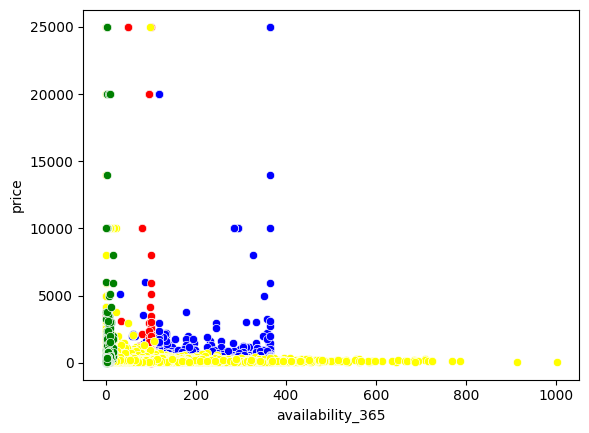

In [12]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=data)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=data)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=data)
sns.scatterplot(x='accommodates', y='price', color="green", data=data)

In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['availability_365', 'host_response_rate','number_of_reviews', 'accommodates']]
Var_Dep= df['price']

In [14]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [17]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.28185937, -1.56643677, -0.57379106, 71.41754092]),
 'rank_': 4,
 'singular_': array([10788.19569718,  7865.77909672,  2975.02334557,   160.77893447]),
 'intercept_': 207.80988794152825}

**Modelo matemático: y= 0.28185937x1 + -1.56643677x2 + -0.57379106x3 + 71.41754092x4 + 207.80988794152825**

In [18]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.016390919255147685

host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

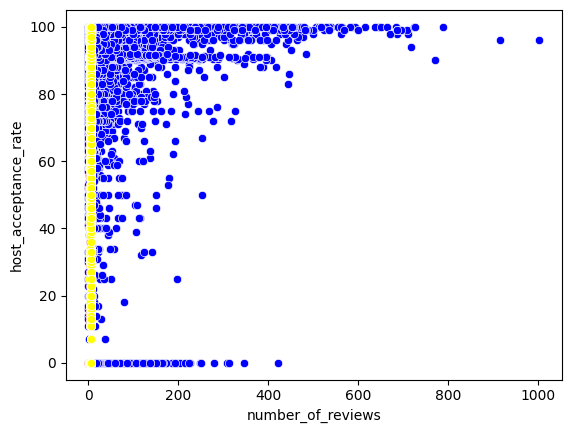

In [19]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=data)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=data)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=data)

In [20]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= df['host_acceptance_rate']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.06263187,  2.3086077 , -1.94015206]),
 'rank_': 3,
 'singular_': array([7872.48842448,   36.15234329,   19.25187202]),
 'intercept_': 74.34141463115577}

**Modelo matemático: y= 0.06263187x1 + 2.3086077x2 + -1.94015206x3 + 74.34141463115577**

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03274063451673659

In [26]:
# Seleccionar los tipos de habitaciones y las variables de interés
room_types = ["Entire home/apt", "Private room"]
variables = ["host_acceptance_rate", "host_response_rate", "review_scores_rating", 
             "price", "availability_365", "number_of_reviews", "review_scores_cleanliness",
             "review_scores_communication"]

# Crear una tabla para almacenar los coeficientes de determinación y correlación
results = pd.DataFrame(columns=["room_type", "variable", "r2", "corr"])

# Calcular los coeficientes de determinación y correlación para todas las combinaciones posibles
for room_type in room_types:
    for variable in variables:
        # Seleccionar los datos correspondientes al tipo de habitación y la variable de interés
        data_subset = data[data["room_type"] == room_type][[variable, "number_of_reviews"]].dropna()
        
        # Crear el modelo de regresión lineal y calcular los coeficientes de determinación y correlación
        if len(data_subset) > 0:
            X = data_subset[variable].values.reshape(-1, 1)
            y = data_subset["number_of_reviews"].values.reshape(-1, 1)
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            corr = data_subset.corr().iloc[0,1]
            
            # Agregar los resultados a la tabla
            results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)

# Imprimir la tabla de resultados
print(results)

<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

          room_type                     variable        r2      corr
0   Entire home/apt         host_acceptance_rate  0.027865  0.166927
1   Entire home/apt           host_response_rate  0.011629  0.107836
2   Entire home/apt         review_scores_rating  0.004704  0.068585
3   Entire home/apt                        price  0.002421 -0.049199
4   Entire home/apt             availability_365  0.009459 -0.097259
5   Entire home/apt            number_of_reviews  1.000000  1.000000
6   Entire home/apt    review_scores_cleanliness  0.007386  0.085942
7   Entire home/apt  review_scores_communication  0.006438  0.080236
8      Private room         host_acceptance_rate  0.041444  0.203579
9      Private room           host_response_rate  0.031733  0.178136
10     Private room         review_scores_rating  0.006990  0.083608
11     Private room                        price  0.005965 -0.077232
12     Private room             availability_365  0.000004 -0.001912
13     Private room            num

<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
